Download Files

In [ ]:
!gdown 13HpGp7Krw5bAVGrgkXnWiJq-B-eG217k
!unzip files.zip

Downloading...
From (original): https://drive.google.com/uc?id=13HpGp7Krw5bAVGrgkXnWiJq-B-eG217k
From (redirected): https://drive.google.com/uc?id=13HpGp7Krw5bAVGrgkXnWiJq-B-eG217k&confirm=t&uuid=aa255219-e756-4520-b166-5ed9317dfaa2
To: /content/files.zip
100% 252M/252M [00:02<00:00, 96.7MB/s]
Archive:  files.zip
replace utils.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: utils.py                
  inflating: images/g0001.jpg        
  inflating: images/desktop.ini      
   creating: models/drions/
  inflating: models/drions/scaler.pkl  
  inflating: models/drions/model.h5  
   creating: models/rimeone3/
  inflating: models/rimeone3/scaler.pkl  
  inflating: models/rimeone3/model.h5  
  inflating: models/rimeone3/desktop.ini  
   creating: models/drishti/
  inflating: models/drishti/scaler.pkl  
  inflating: models/drishti/model.h5  
  inflating: models/drishti/desktop.ini  
  inflating: models/desktop.ini      


Define parameters

In [ ]:
IMAGE_SIZE = 224
IMAGE_PATH = "/content/images/g0001.jpg"
TRAINED_DATASET = "rimone3" #rimone3, drishti or drions

Load Model Weights and Extract Features

In [ ]:
from keras.applications.vgg16 import VGG16
from utils import image_feature_extract

model = VGG16(weights='imagenet',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3))

features = image_feature_extract(model,IMAGE_PATH,IMAGE_SIZE)

Load Trained ANN Model and Prediction

In [ ]:
import os
import pickle
from keras.models import load_model

modelMLP = load_model(os.path.join("models",TRAINED_DATASET,"model.h5"))
with open(os.path.join("models",TRAINED_DATASET,'scaler.pkl'), 'rb') as fp:
  scaler = pickle.load(fp)

features = scaler.transform(features[:,:1472])
y_head = modelMLP.predict(features[:,:1472])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1568/1568 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step


Plot the predicted image

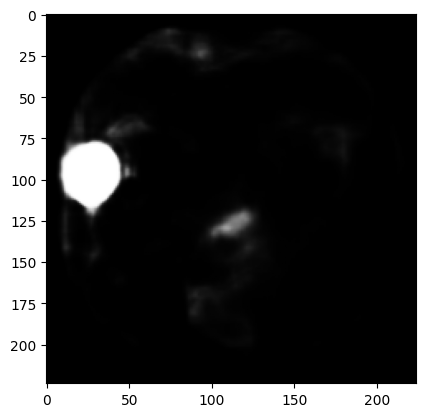

In [ ]:
import matplotlib.pyplot as plt
y_img =y_head.reshape(IMAGE_SIZE,IMAGE_SIZE)
plt.imshow(y_img,cmap="gray")


Apply Thresholding to prediction

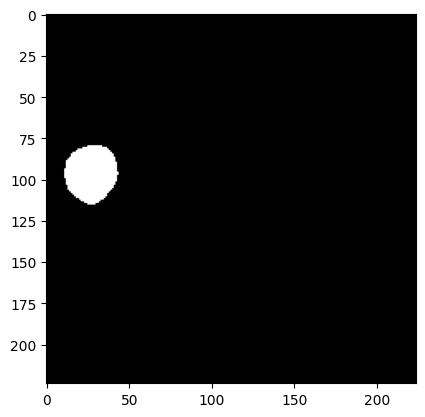

In [ ]:
TH = 0.995
plt.imshow( (y_img > TH).astype(int),cmap="gray")